1. O Problema de Negócio
Uma empresa de telecomunicações está perdendo clientes para os concorrentes. O objetivo é identificar quais clientes têm maior probabilidade de cancelar o serviço e por quê. Se pudermos prever isso, a empresa pode oferecer descontos ou benefícios antes que o cliente saia.

2. Onde baixar os dados?
Utilize o dataset "Telco Customer Churn" do Kaggle. É um clássico, bem estruturado e perfeito para demonstrar habilidades de limpeza e modelagem.
https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [438]:
# importação das bibliotecas que serão utilizadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

In [439]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [440]:
df.info() # comando mostra a quantidade de linhas e variáveis, mostra sem tem valores faltando e o tipo de cada variável

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Temos 7043 linhas e 21 colunas e não temos valores faltando.
dessas 21 colunas temos 3 numéricas e 18 object.

In [441]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [442]:
df.drop('customerID', axis=1, inplace=True)#comando para apagar a colunas customerID, essa coluna não agrega valor ao projeto.

In [443]:
df.columns = ['gênero', 'Idoso', 'Parceiro', 'Dependentes', 'tempo de contrato',
'Serviço Telefônico', 'Múltiplas Linhas', 'Serviço de Internet', 'Segurança Online',
'Backup Online', 'Proteção de Dispositivo', 'Suporte Técnico', 'TV por Streaming',
'Filmes por Streaming', 'Contrato', 'Fatura Digital', 'Método de Pagamento',
'Valores Mensais', 'Valores Totais', 'Cancelamento de Contrato']

In [444]:
df['Valores Totais'] = pd.to_numeric(df['Valores Totais'], errors='coerce')

In [445]:
df['Valores Mensais'] = df['Valores Mensais'].astype(float)
df['Valores Totais'] = df['Valores Totais'].astype(float)

In [446]:
df['tempo de contrato'] = df['tempo de contrato'].astype(float)

In [447]:
df.isna().sum() # comando mostra a quantidade de valores faltando

,0
gênero,0
Idoso,0
Parceiro,0
Dependentes,0
tempo de contrato,0
Serviço Telefônico,0
Múltiplas Linhas,0
Serviço de Internet,0
Segurança Online,0
Backup Online,0


In [448]:
df.duplicated().sum() # comando mostra a quantidade de linhas duplicadas

np.int64(22)

In [449]:
df.drop_duplicates(inplace=True) # comando apaga as linhas duplicadas
df.dropna(inplace=True) # comando apaga as linhas com valores faltando

In [450]:
df.info() # comando mostra a quantidade de linhas e variáveis, mostra sem tem valores faltando e o tipo de cada variável

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gênero                    7010 non-null   object 
 1   Idoso                     7010 non-null   int64  
 2   Parceiro                  7010 non-null   object 
 3   Dependentes               7010 non-null   object 
 4   tempo de contrato         7010 non-null   float64
 5   Serviço Telefônico        7010 non-null   object 
 6   Múltiplas Linhas          7010 non-null   object 
 7   Serviço de Internet       7010 non-null   object 
 8   Segurança Online          7010 non-null   object 
 9   Backup Online             7010 non-null   object 
 10  Proteção de Dispositivo   7010 non-null   object 
 11  Suporte Técnico           7010 non-null   object 
 12  TV por Streaming          7010 non-null   object 
 13  Filmes por Streaming      7010 non-null   object 
 14  Contrato     

In [451]:
df.dropna(inplace=True)

In [452]:
df['Cancelamento de Contrato'].value_counts() # Esse comando nos mostra a quantidade de contratos cancelados e não cancelados

,count
Cancelamento de Contrato,
No,5153
Yes,1857


Temos 5174 contratos que não foram cancelados e 1869 que foram cancelados.

In [453]:
df['Cancelamento de Contrato'].value_counts(normalize=True) * 100 # O mesmo comando mais nos mostra o percentual

,proportion
Cancelamento de Contrato,
No,73.509
Yes,26.491


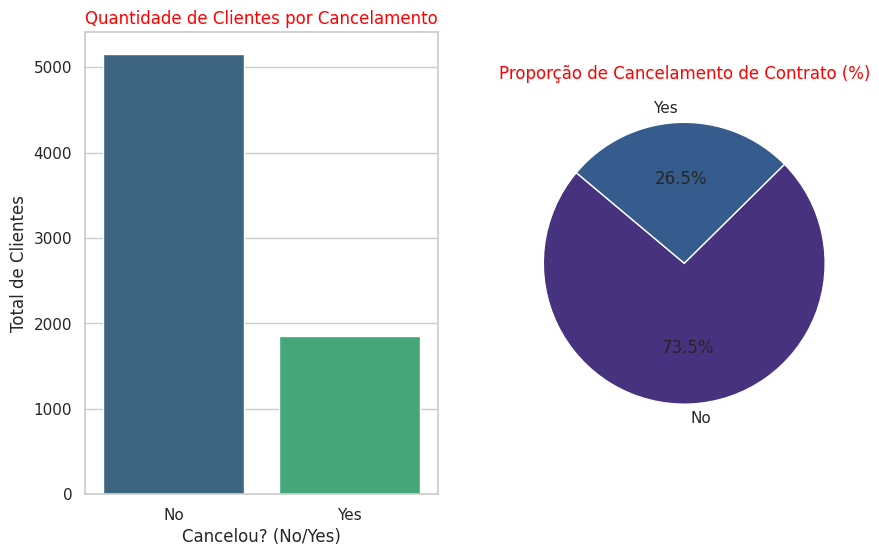

In [454]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='Cancelamento de Contrato', ax=ax[0], palette='viridis')
ax[0].set_title('Quantidade de Clientes por Cancelamento', fontsize=12, color='red')
ax[0].set_xlabel('Cancelou? (No/Yes)')
ax[0].set_ylabel('Total de Clientes')



Cancelamento = df['Cancelamento de Contrato'].value_counts()
ax[1].pie(Cancelamento, labels=Cancelamento.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis'))
ax[1].set_title('Proporção de Cancelamento de Contrato (%)', fontsize=12,color='red')

plt.show()

Aqui vemos a quantidade de clientes que não cancelou é bem maior do que os que cancelaram o serviço.

In [455]:
df['gênero'].value_counts() # comando mostra a quantidade por gênero.

,count
gênero,
Male,3535
Female,3475


In [456]:
pd.crosstab(df['gênero'], df['Cancelamento de Contrato'], normalize='index').style.background_gradient(cmap='Blues').format('{:.2%}').set_caption("Análise de Cancelamento por Gênero")

Cancelamento de Contrato,No,Yes
gênero,,
Female,73.12%,26.88%
Male,73.89%,26.11%


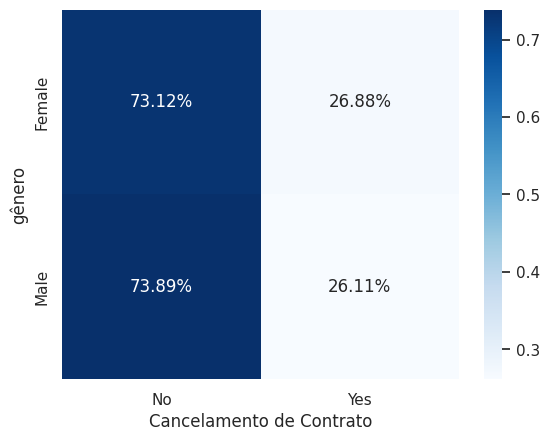

In [457]:
sexo_cancelamento = pd.crosstab(df['gênero'], df['Cancelamento de Contrato'], normalize='index')
sns.heatmap(sexo_cancelamento, annot=True, cmap='Blues', fmt='.2%');

Vemos que as classes estão balanceadas

In [458]:
df[['Parceiro','Cancelamento de Contrato']].groupby(['Parceiro','Cancelamento de Contrato'])['Cancelamento de Contrato'].count()

Parceiro  Cancelamento de Contrato
No        No                          2429
          Yes                         1188
Yes       No                          2724
          Yes                          669
Name: Cancelamento de Contrato, dtype: int64

In [459]:
df[['Parceiro','Cancelamento de Contrato']].value_counts(normalize=True) * 100

Parceiro  Cancelamento de Contrato
Yes       No                         38.859
No        No                         34.650
          Yes                        16.947
Yes       Yes                         9.544
Name: proportion, dtype: float64

vemos uma situação interessante, não tem parceiro não cancelado 2441 e cancelado 1200.

Tem parceiro não cancelado 2733 e cancelado 669

conclusão é que os clientes Não tem parceiros cancelam mais o serviço dos que tem parceiros.

In [460]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Criando a tabela com os dados que você passou
# Linhas: Sem Parceiro, Com Parceiro
# Colunas: Não Cancelou, Cancelou
dados = [
    [2441, 1200], # Sem parceiro
    [2733, 669]   # Com parceiro
]

tabela_contingencia = pd.DataFrame(dados,
                                   columns=['Não Cancelou', 'Cancelou'],
                                   index=['Sem Parceiro', 'Com Parceiro'])

# 2. Executando o teste
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p:.4g}") # Usando .4g para ver notação científica se for muito pequeno
print(f"P-valor formatado: {p:.40f}")

Estatística Qui-Quadrado: 158.7334
P-valor: 2.14e-36
P-valor formatado: 0.0000000000000000000000000000000000021399


A chance dessa diferença entre clientes com e sem parceiros ser obra do acaso é praticamente zero. Existe uma dependência real entre ter um parceiro e a decisão de cancelar o serviço.

In [461]:
df[['Dependentes','Cancelamento de Contrato']].groupby(['Dependentes','Cancelamento de Contrato'])['Cancelamento de Contrato'].count()

Dependentes  Cancelamento de Contrato
No           No                          3380
             Yes                         1531
Yes          No                          1773
             Yes                          326
Name: Cancelamento de Contrato, dtype: int64

In [462]:
pd.crosstab(df['Dependentes'],df['Cancelamento de Contrato'], normalize=True).style.background_gradient(cmap='Blues').set_caption("Análise de Cancelamento por Dependentes")

Cancelamento de Contrato,No,Yes
Dependentes,,
No,0.482168,0.218402
Yes,0.252924,0.046505


In [463]:
tabela_prop = pd.crosstab(df['Dependentes'], df['Cancelamento de Contrato'], normalize='index')

print("Taxa de Cancelamento por Categoria (Probabilidade):")
tabela_prop.style.format('{:.2%}').background_gradient(cmap='Reds', subset='Yes')

Taxa de Cancelamento por Categoria (Probabilidade):


Cancelamento de Contrato,No,Yes
Dependentes,,
No,68.83%,31.17%
Yes,84.47%,15.53%


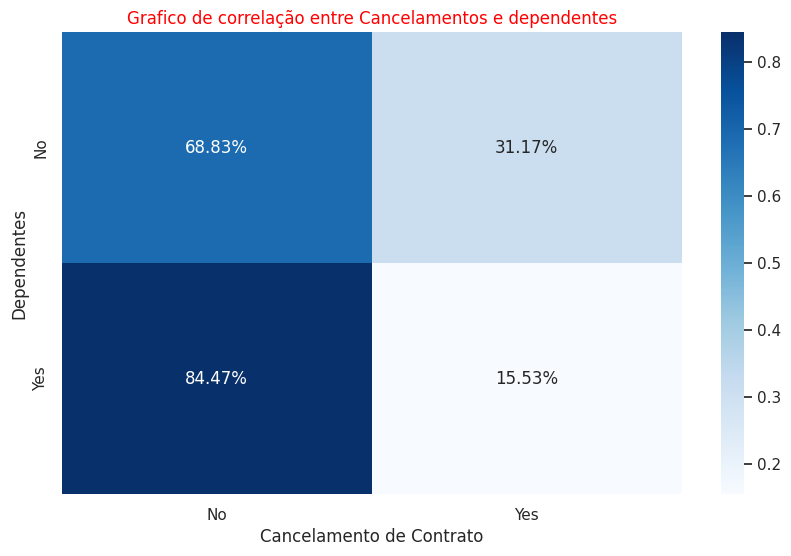

In [464]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_prop, annot=True, cmap='Blues', fmt='.2%');
plt.title('Grafico de correlação entre Cancelamentos e dependentes', color='red')
plt.show()

Grupo "No" (Sem Dependentes): De cada 100 clientes que não possuem dependentes, aproximadamente 31 cancelam o serviço.

Grupo "Yes" (Com Dependentes): De cada 100 clientes que possuem dependentes, apenas cerca de 15 cancelam.


O Insight de Negócio
A chance de um cliente sem dependentes cancelar é mais que o dobro (2.02x) da chance de um cliente com dependentes.

In [465]:
df[['tempo de contrato','Cancelamento de Contrato']].groupby('Cancelamento de Contrato').mean()

,tempo de contrato
Cancelamento de Contrato,
No,37.721
Yes,18.089


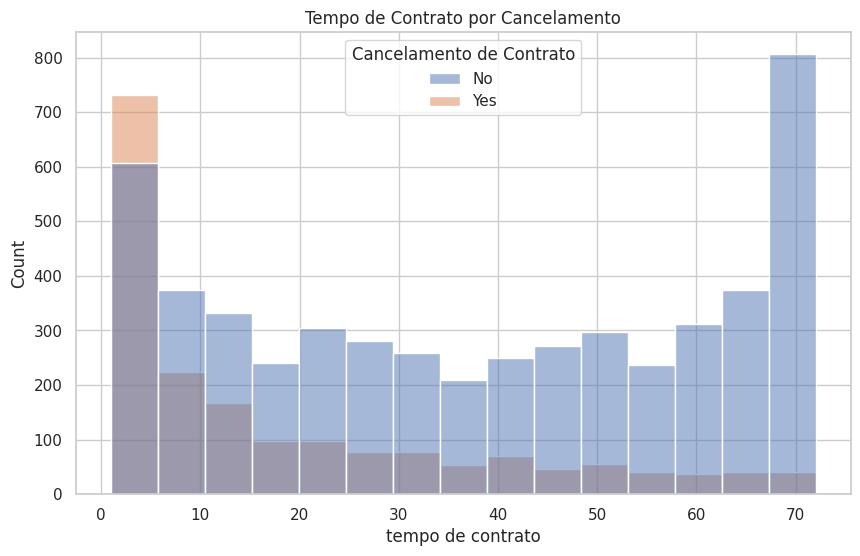

In [466]:
plt.figure(figsize=(10, 6))
plt.title('Tempo de Contrato por Cancelamento')
sns.histplot(hue='Cancelamento de Contrato', x='tempo de contrato', data=df, color=sns.color_palette('Set1'))
plt.show()

Os que cancelam tem em média menos tempo de contrato do que os que não cancelam.

In [467]:
serv_telefone = pd.crosstab(df['Serviço Telefônico'],df['Cancelamento de Contrato'], normalize='index' ) * 100
serv_telefone

Cancelamento de Contrato,No,Yes
Serviço Telefônico,,
No,75.000,25.000
Yes,73.349,26.651


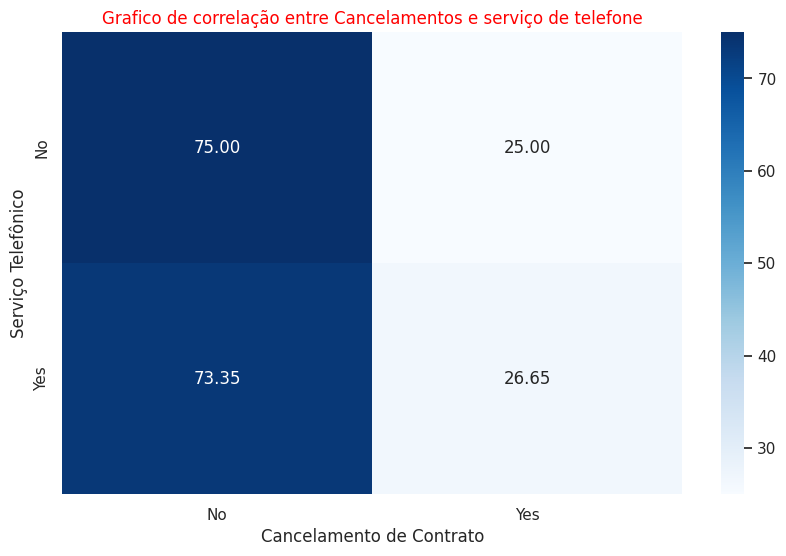

In [468]:
plt.figure(figsize=(10, 6))
sns.heatmap(serv_telefone, annot=True, cmap='Blues', fmt='.2f');
plt.title('Grafico de correlação entre Cancelamentos e serviço de telefone', color='red')
plt.show()

Clientes SEM Serviço Telefônico (No):

75,07% desses clientes permaneceram na empresa (Não cancelaram).

24,93% desses clientes cancelaram o contrato (Churn).

Clientes COM Serviço Telefônico (Yes):

73,29% desses clientes permaneceram na empresa.

26,71% desses clientes cancelaram o contrato.

Insights:
Impacto do Serviço: A taxa de cancelamento entre quem tem telefone (26,71%) é ligeiramente maior do que entre quem não tem (24,93%).

Diferença Minimalista: A diferença de churn entre os dois grupos é de apenas 1,78%. Isso sugere que ter ou não um serviço telefônico, isoladamente, pode não ser o fator principal que leva um cliente a cancelar o contrato.

Tendência de Retenção: Em ambos os grupos, a grande maioria (mais de 73%) decide manter o contrato.



In [469]:
df.head(3)

,gênero,Idoso,Parceiro,Dependentes,tempo de contrato,Serviço Telefônico,Múltiplas Linhas,Serviço de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,TV por Streaming,Filmes por Streaming,Contrato,Fatura Digital,Método de Pagamento,Valores Mensais,Valores Totais,Cancelamento de Contrato
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes


In [470]:
df['Serviço Telefônico'].value_counts()

,count
Serviço Telefônico,
Yes,6330
No,680


In [471]:
telefone  = df[['Serviço Telefônico','Cancelamento de Contrato']].groupby(['Serviço Telefônico','Cancelamento de Contrato']).value_counts()

In [472]:
telefone = telefone.unstack()
telefone

Cancelamento de Contrato,No,Yes
Serviço Telefônico,,
No,510,170
Yes,4643,1687


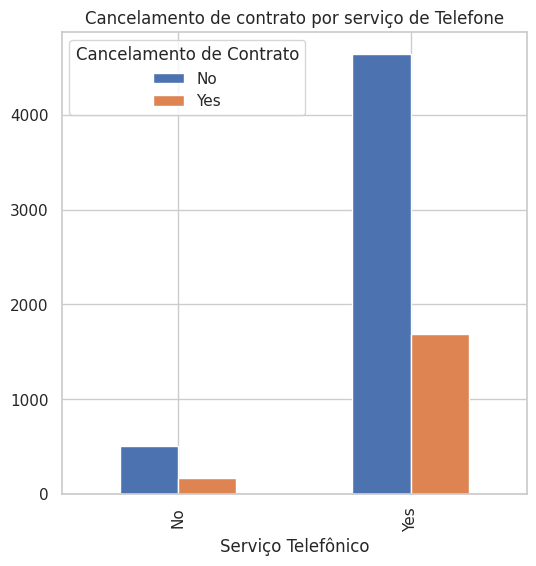

In [473]:
telefone.plot(kind='bar', stacked=False, figsize=(6, 6), title='Cancelamento de contrato por serviço de Telefone' );

A vasta maioria dos seus clientes (6.361) possui serviço telefônico, enquanto apenas 682 não possuem.

Como o grupo que "Não tem telefone" é muito pequeno comparado ao outro, qualquer pequena variação numérica ali gera um impacto grande na porcentagem.

No grupo com telefone, Cancelamento (1.699) é quase 1/3 do total de quem não cancelou (4.662).

In [474]:
multiplas_linhas = df[['Múltiplas Linhas','Cancelamento de Contrato']].groupby(['Múltiplas Linhas','Cancelamento de Contrato'])['Cancelamento de Contrato'].count().unstack()

In [475]:
multiplas_linhas

Cancelamento de Contrato,No,Yes
Múltiplas Linhas,,
No,2526,837
No phone service,510,170
Yes,2117,850


In [476]:
mul_linhas = pd.crosstab(df['Múltiplas Linhas'],df['Cancelamento de Contrato'], normalize='index' ) * 100
mul_linhas

Cancelamento de Contrato,No,Yes
Múltiplas Linhas,,
No,75.112,24.888
No phone service,75.000,25.000
Yes,71.352,28.648


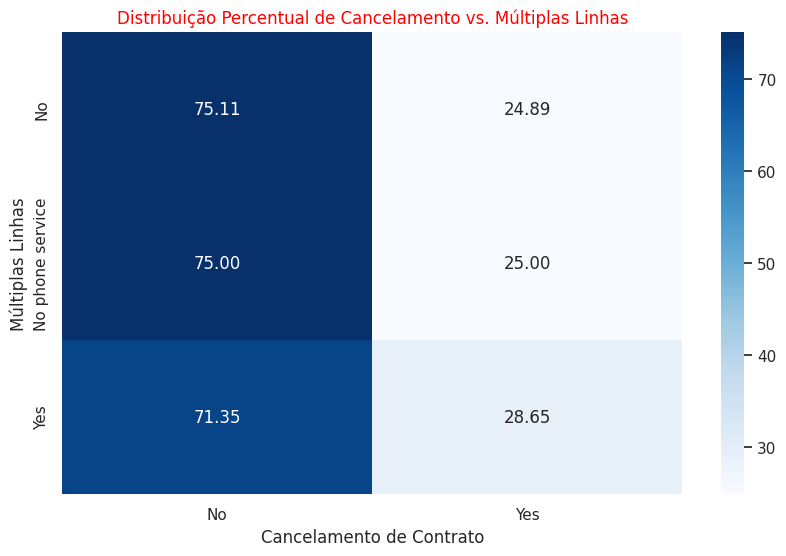

In [477]:
plt.figure(figsize=(10, 6))
sns.heatmap(mul_linhas, annot=True, cmap='Blues', fmt='.2f');
plt.title("Distribuição Percentual de Cancelamento vs. Múltiplas Linhas", color='red')
plt.show()

<Axes: title={'center': 'Cancelamento de contrato por Múltiplas Linhas'}, xlabel='Múltiplas Linhas'>

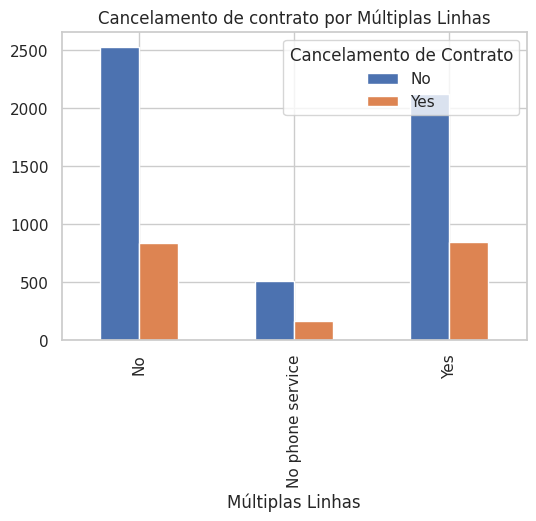

In [478]:
multiplas_linhas.plot(kind='bar', stacked=False, figsize=(6, 4), title='Cancelamento de contrato por Múltiplas Linhas')

A "Linha Única" é o maior risco: Embora a maioria não cancele, o grupo de pessoas com apenas uma linha (identificado como "Yes" ) tem a maior taxa de evasão (28.61%). Isso sugere que clientes com menos vínculos ou serviços menos complexos têm mais facilidade de trocar de operadora.

Clientes com múltiplas linhas ou serviços combinados tendem a cancelar um pouco menos. Isso geralmente acontece pelo "efeito de rede" ou descontos progressivos que dificultam a saída do cliente.

A diferença entre "Múltiplas Linhas" e "Sem serviço de telefone" é mínima (cerca de 0.11%), o que indica que ter ou não ter o serviço de telefone fixo não é o fator principal que segura o cliente, mas sim a quantidade de serviços vinculados.

O foco principal deve ser o grupo de Linha Única, oferecendo upgrades para múltiplas linhas para aumentar o "custo de saída" desse cliente.


In [479]:
tipos_internet = df[['Serviço de Internet','Cancelamento de Contrato']].groupby(['Serviço de Internet','Cancelamento de Contrato'])['Cancelamento de Contrato'].count().rename('Quantidade').reset_index()
tipos_internet = tipos_internet.reset_index().drop('index', axis=1)
tipos_internet

,Serviço de Internet,Cancelamento de Contrato,Quantidade
0,DSL,No,1957
1,DSL,Yes,457
2,Fiber optic,No,1799
3,Fiber optic,Yes,1291
4,No,No,1397
5,No,Yes,109


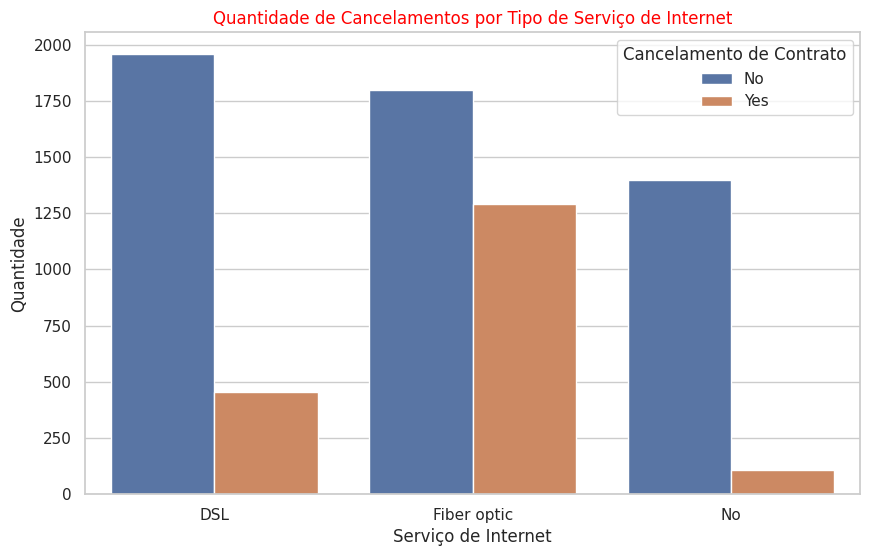

In [480]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Serviço de Internet', y='Quantidade', hue='Cancelamento de Contrato', data=tipos_internet)
plt.title('Quantidade de Cancelamentos por Tipo de Serviço de Internet', color='red')
plt.show()

Note que a barra laranja (Yes) da Fibra Óptica é quase tão alta quanto a barra azul (No).

Insight: Isso sugere que, apesar de ser uma tecnologia superior, os clientes de fibra podem estar insatisfeitos com o preço, com a estabilidade do sinal ou encontrando ofertas melhores na concorrência.

O serviço DSL possui a maior base de clientes que permanecem na empresa (barra azul mais alta).

A quantidade de cancelamentos é significativamente menor do que na fibra óptica.

Insight: Clientes de DSL tendem a ser mais estáveis, possivelmente por serem clientes mais antigos ou por terem um custo-benefício que atende às suas expectativas.


Os clientes que não possuem serviço de internet contratado apresentam o menor índice de cancelamento absoluto.

Insight: Clientes que utilizam apenas serviços de telefonia fixa, por exemplo, raramente cancelam o contrato em comparação aos usuários de internet.

O gráfico indica que a empresa tem um problema sério de retenção de clientes de Fibra Óptica.

In [481]:
pd.crosstab(df['Segurança Online'],df['Cancelamento de Contrato'] ).style.background_gradient()

Cancelamento de Contrato,No,Yes
Segurança Online,,
No,2036,1453
No internet service,1397,109
Yes,1720,295


In [482]:
Segurança_Online = pd.crosstab(df['Segurança Online'],df['Cancelamento de Contrato'],normalize='index' ) * 100
Segurança_Online

Cancelamento de Contrato,No,Yes
Segurança Online,,
No,58.355,41.645
No internet service,92.762,7.238
Yes,85.360,14.640


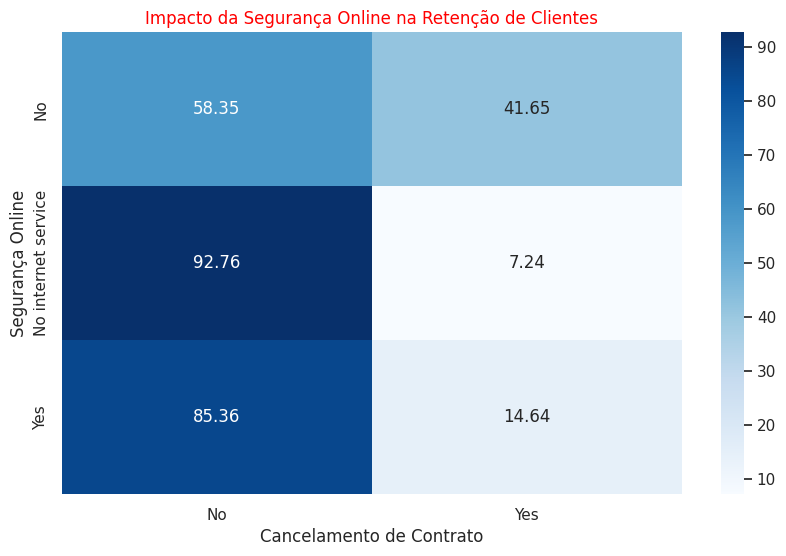

In [483]:
plt.figure(figsize=(10, 6))
sns.heatmap(Segurança_Online, annot=True, cmap='Blues', fmt='.2f');
plt.title('Impacto da Segurança Online na Retenção de Clientes', color='red')
plt.show()

In [484]:
df.head()

,gênero,Idoso,Parceiro,Dependentes,tempo de contrato,Serviço Telefônico,Múltiplas Linhas,Serviço de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,TV por Streaming,Filmes por Streaming,Contrato,Fatura Digital,Método de Pagamento,Valores Mensais,Valores Totais,Cancelamento de Contrato
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [485]:
df['Backup Online'].nunique()

3

Três valores

In [486]:
df['Backup Online'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [487]:
df['Backup Online'].value_counts()

,count
Backup Online,
No,3079
Yes,2425
No internet service,1506


In [488]:
df['Backup Online'].value_counts(normalize=True) * 100

,proportion
Backup Online,
No,43.923
Yes,34.593
No internet service,21.484


A porcentagem No serviço de internet é quase que a metade do No.

In [489]:
Backup_Online = pd.crosstab(df['Backup Online'],df['Cancelamento de Contrato'],normalize='index' ) * 100
Backup_Online

Cancelamento de Contrato,No,Yes
Backup Online,,
No,60.214,39.786
No internet service,92.762,7.238
Yes,78.433,21.567


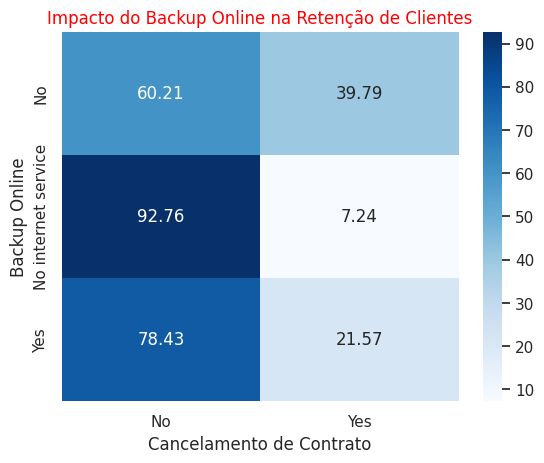

In [490]:
sns.heatmap(Backup_Online, annot=True, cmap='Blues', fmt='.2f');
plt.title('Impacto do Backup Online na Retenção de Clientes', color='red')
plt.show()

"Observa-se que clientes sem serviço de internet apresentam uma taxa de cancelamento inferior à daqueles que utilizam o serviço. Adicionalmente, a adesão ao serviço de backup atua como um fator de retenção, visto que usuários com esse recurso cancelam menos do que os que não o possuem."

In [491]:
df['Proteção de Dispositivo'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [492]:
df['Proteção de Dispositivo'].nunique()

3

In [493]:
df['Proteção de Dispositivo'].value_counts()

,count
Proteção de Dispositivo,
No,3086
Yes,2418
No internet service,1506


In [494]:
protecao_dispositivo = pd.crosstab(df['Proteção de Dispositivo'],df['Cancelamento de Contrato'],normalize='index' ) * 100
protecao_dispositivo.style.background_gradient()

Cancelamento de Contrato,No,Yes
Proteção de Dispositivo,,
No,61.017498,38.982502
No internet service,92.762284,7.237716
Yes,77.460711,22.539289


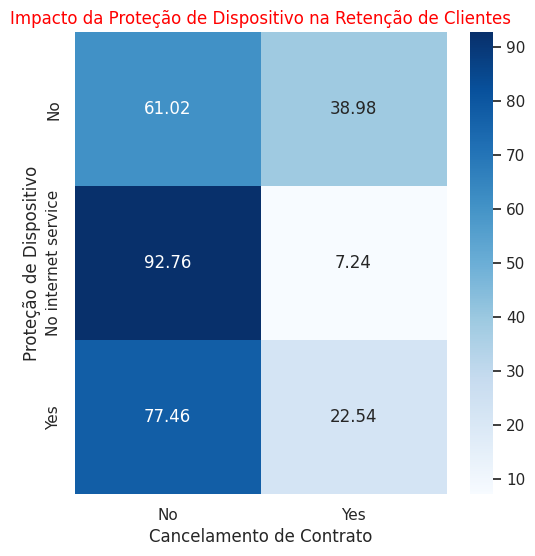

In [495]:
plt.figure(figsize=(6,6))
sns.heatmap(protecao_dispositivo, annot=True, cmap='Blues', fmt='.2f');
plt.title('Impacto da Proteção de Dispositivo na Retenção de Clientes', color='red')
plt.show()

In [496]:
df.head()

,gênero,Idoso,Parceiro,Dependentes,tempo de contrato,Serviço Telefônico,Múltiplas Linhas,Serviço de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,TV por Streaming,Filmes por Streaming,Contrato,Fatura Digital,Método de Pagamento,Valores Mensais,Valores Totais,Cancelamento de Contrato
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [497]:
df['TV por Streaming'].value_counts()

,count
TV por Streaming,
No,2801
Yes,2703
No internet service,1506


In [498]:
tv_streaming = df['TV por Streaming'].value_counts(normalize=True) * 100
tv_streaming

,proportion
TV por Streaming,
No,39.957
Yes,38.559
No internet service,21.484


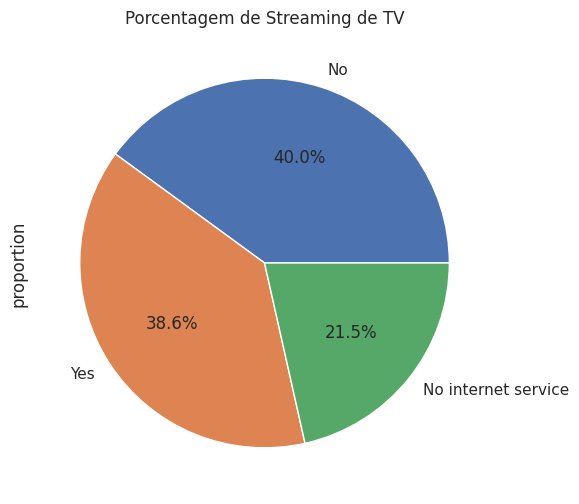

In [499]:
tv_streaming.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Porcentagem de Streaming de TV')
plt.show()

Mercado Dividido: Entre quem tem internet, a disputa é acirrada. Quase metade assina (38,5%) e a outra metade não (39,9%). Isso sugere que há uma grande oportunidade para tentar converter esses 39,9% em assinantes de TV.

Limitação Técnica: Mais de 21% dos seus clientes nem sequer têm acesso à tecnologia necessária para o streaming. Para crescer nesse grupo, a empresa precisaria primeiro vender o plano de internet.

Equilíbrio: Não há uma dominância clara do serviço de streaming. O grupo que "não assina" ainda é levemente superior ao que "assina".

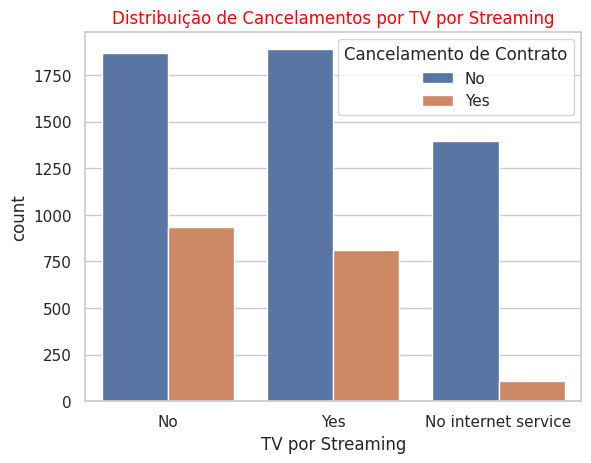

In [500]:
sns.countplot(data=df, x='TV por Streaming', hue='Cancelamento de Contrato')
plt.title('Distribuição de Cancelamentos por TV por Streaming', color='red')
plt.show()

O Grupo de Risco: Quem tem Internet, mas NÃO tem TV
Olhando para a primeira coluna (No), vemos que a barra laranja (cancelamentos) é proporcionalmente alta em relação à azul (permanência).

Insight: Clientes que possuem internet, mas não assinam o streaming de TV, parecem ter uma taxa de cancelamento maior do que os outros grupos. Isso pode indicar que o serviço de internet sozinho não está retendo o cliente, ou que a concorrência está oferecendo combos mais atraentes.

2. O Fator de Retenção: Quem tem Streaming (Yes)
Embora o número total de clientes seja similar ao grupo anterior, a barra laranja é visivelmente menor aqui.

Insight: Clientes que assinam TV por Streaming tendem a cancelar menos. Isso sugere que o streaming funciona como um "produto de fidelização" (stickiness). Quanto mais serviços o cliente consome da empresa, mais difícil é para ele cancelar.

3. O Porto Seguro: Sem Internet (No internet service)
Nesta categoria, o cancelamento é quase inexistente (barra laranja muito pequena).

Insight: Clientes que não possuem internet (provavelmente planos apenas de telefonia fixa) são os mais leais ou estáveis. Porém, como vimos nos seus dados anteriores, eles são a minoria da base (21%).

In [501]:
df["Filmes por Streaming"].value_counts()

,count
Filmes por Streaming,
No,2773
Yes,2731
No internet service,1506


In [502]:
filmes_streaming = df['Filmes por Streaming'].value_counts(normalize=True) * 100

In [503]:
filmes_streaming

,proportion
Filmes por Streaming,
No,39.558
Yes,38.959
No internet service,21.484


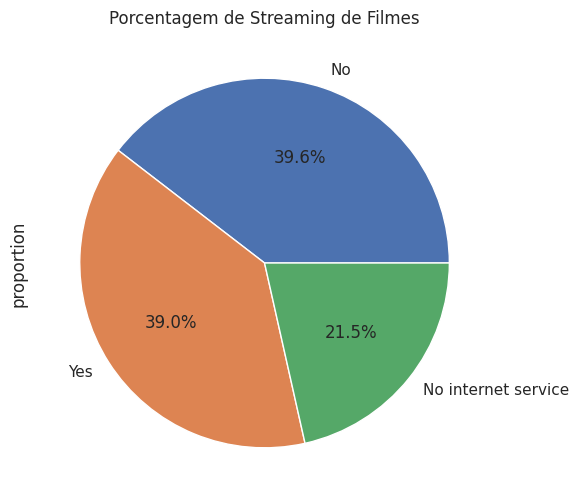

In [504]:
filmes_streaming.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Porcentagem de Streaming de Filmes')
plt.show()

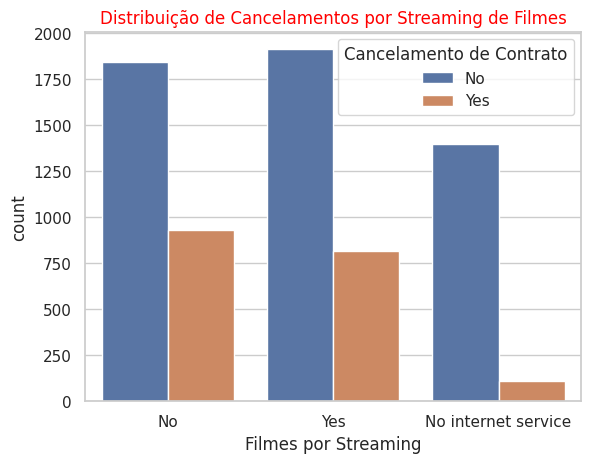

In [505]:
sns.countplot(data=df, x='Filmes por Streaming', hue='Cancelamento de Contrato')
plt.title('Distribuição de Cancelamentos por Streaming de Filmes', color='red')
plt.show()

O "Efeito Retenção" do Streaming: Clientes que utilizam o serviço de streaming de filmes tendem a cancelar menos (29,95%) do que aqueles que não utilizam (33,54%). Isso sugere que o conteúdo de entretenimento é um fator que ajuda a segurar o cliente.

O Grupo de Baixo Risco: O grupo que não possui serviço de internet apresenta a menor taxa de cancelamento disparada (7,24%). Isso é comum em serviços de telefonia fixa tradicional ou planos muito básicos, onde a fidelidade costuma ser maior ou a oferta de concorrência é menor.

Margem de Melhora: Embora o streaming ajude na retenção, uma taxa de cancelamento de quase 30% ainda é considerada alta para o setor, indicando que outros fatores (preço, suporte ou qualidade da conexão) podem estar influenciando a saída dos clientes.

In [506]:
df.head()

,gênero,Idoso,Parceiro,Dependentes,tempo de contrato,Serviço Telefônico,Múltiplas Linhas,Serviço de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,TV por Streaming,Filmes por Streaming,Contrato,Fatura Digital,Método de Pagamento,Valores Mensais,Valores Totais,Cancelamento de Contrato
0,Female,0,Yes,No,1.000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [507]:
df.Contrato.value_counts()

,count
Contrato,
Month-to-month,3853
Two year,1685
One year,1472


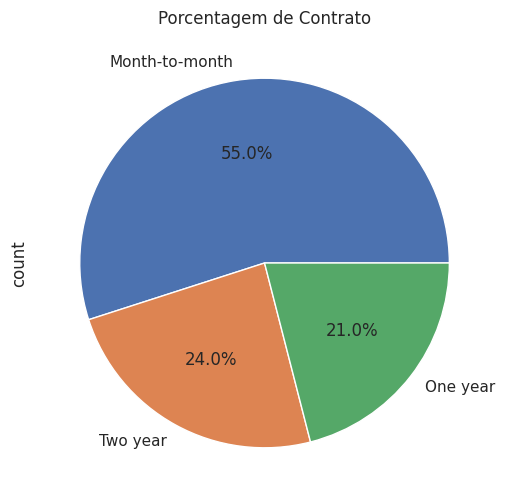

In [508]:
df.Contrato.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Porcentagem de Contrato' );

Month-to-month (Mês a mês): 55% * A grande maioria dos clientes prefere não se comprometer a longo prazo. Isso representa mais da metade da base.

Two year (Dois anos): 24%

Quase um quarto dos clientes opta pela fidelidade máxima, geralmente em troca de descontos ou benefícios.

One year (Um ano): 21%

A menor parcela do grupo, servindo como um meio-termo entre a flexibilidade e o contrato longo.

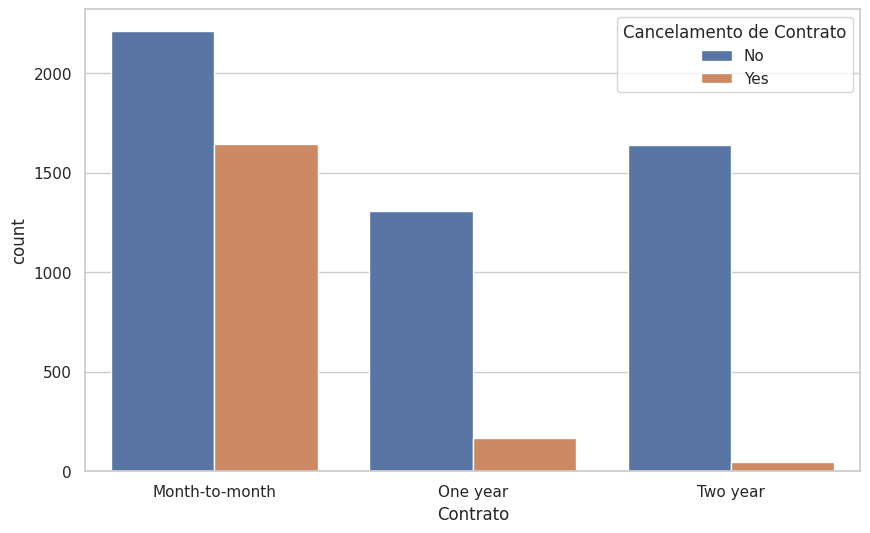

In [509]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contrato', hue='Cancelamento de Contrato')
plt.show()

1. Contratos Mensais (Month-to-month)
Volume de cancelamento altíssimo: Este grupo apresenta o maior número absoluto de cancelamentos ("Yes"), ultrapassando a marca de 1.500.

Proporção crítica: A diferença entre quem fica ("No") e quem sai ("Yes") é muito menor do que nos outros grupos, indicando que clientes mensais têm uma propensão muito maior a abandonar o serviço.

2. Contratos de Um Ano (One year)
Aumento da retenção: O número de cancelamentos cai drasticamente em comparação ao plano mensal, ficando abaixo de 500.

Estabilidade: A vasta maioria dos clientes neste contrato decide permanecer com o serviço.

3. Contratos de Dois Anos (Two year)
Fidelidade máxima: Este é o cenário ideal para a empresa. O cancelamento é quase irrelevante (uma barra laranja mínima), enquanto o volume de clientes que permanecem ("No") é muito alto, superando 1.500.

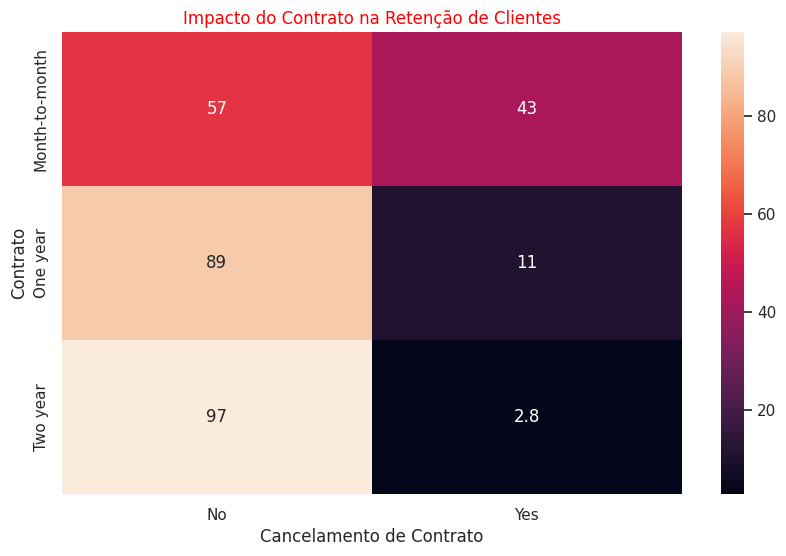

In [510]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Contrato'],df['Cancelamento de Contrato'],normalize='index' ) * 100, annot=True),
plt.title('Impacto do Contrato na Retenção de Clientes', color='red')
plt.show()

Quanto maior a duração do contrato, menor é a chance de o cliente ir embora.

In [511]:
df['Fatura Digital'].value_counts()

,count
Fatura Digital,
Yes,4158
No,2852


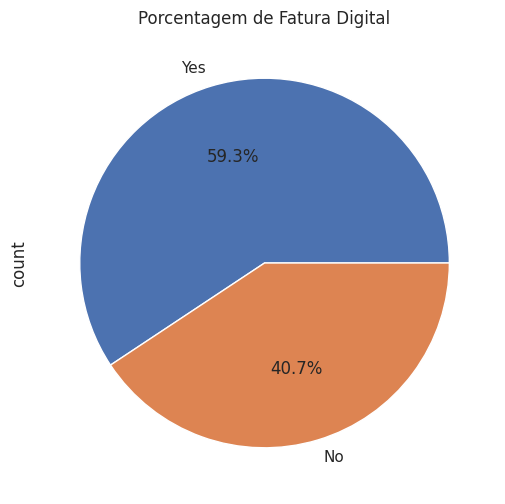

In [512]:
df['Fatura Digital'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6, 6), title='Porcentagem de Fatura Digital');

59.3% da base utiliza a fatura digital.

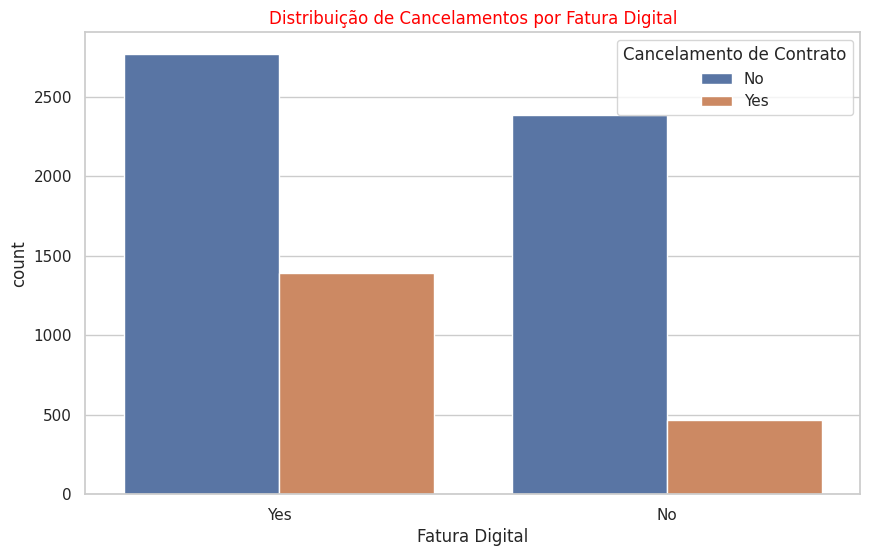

In [513]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fatura Digital', hue='Cancelamento de Contrato')
plt.title('Distribuição de Cancelamentos por Fatura Digital', color='red')
plt.show()

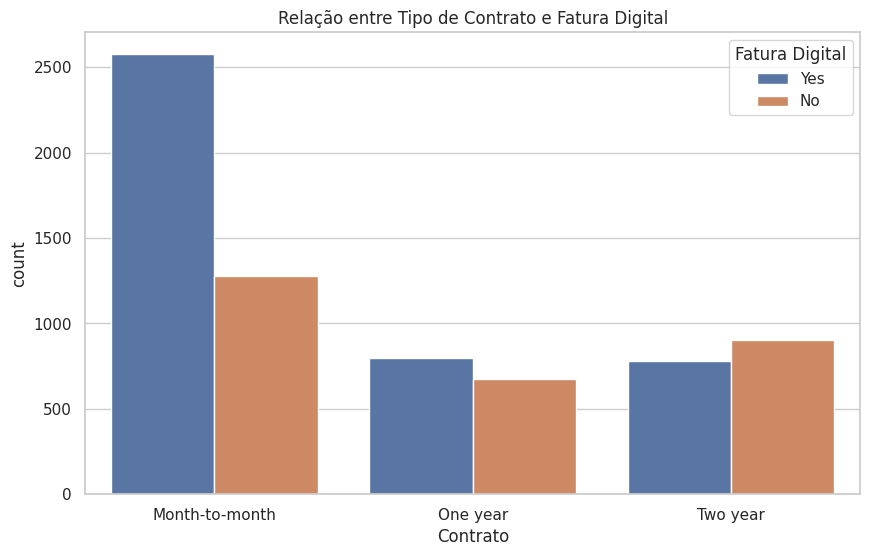

In [514]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Contrato', hue='Fatura Digital')

plt.title('Relação entre Tipo de Contrato e Fatura Digital')
plt.show()

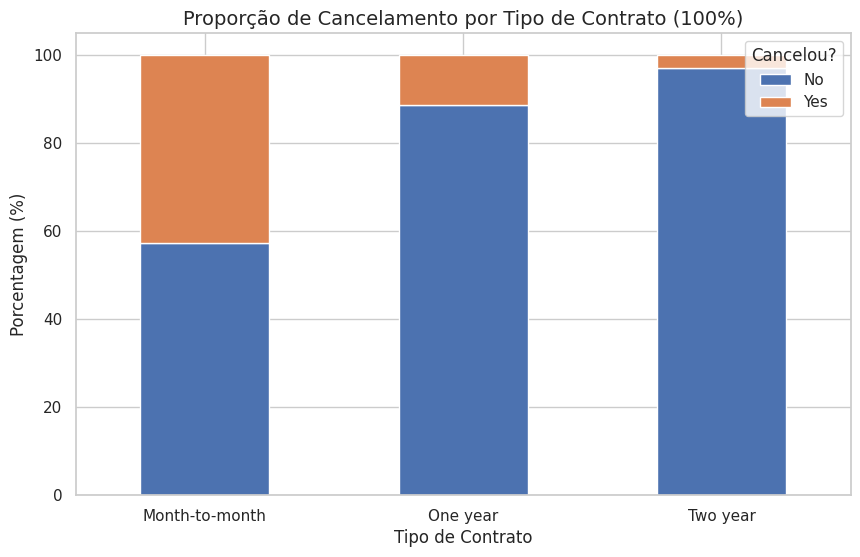

In [515]:
tabela_prop = pd.crosstab(df['Contrato'], df['Cancelamento de Contrato'], normalize='index') * 100


tabela_prop.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4C72B0', '#DD8452'])

plt.title('Proporção de Cancelamento por Tipo de Contrato (100%)', fontsize=14)
plt.ylabel('Porcentagem (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Cancelou?', loc='upper right')

plt.show()

Aqui vemos que as pessoas que preferem o contrato mais curto cancelam mais dos que os que preferem o contrato mais longo. Isso se justifica pela liberdade de não está preso ao contrato.

In [516]:
df['Método de Pagamento'].value_counts()

,count
Método de Pagamento,
Electronic check,2359
Mailed check,1588
Bank transfer (automatic),1542
Credit card (automatic),1521


A grande maioria dos clientes efetuam o pagamento por Cheque eletrônico.

[]

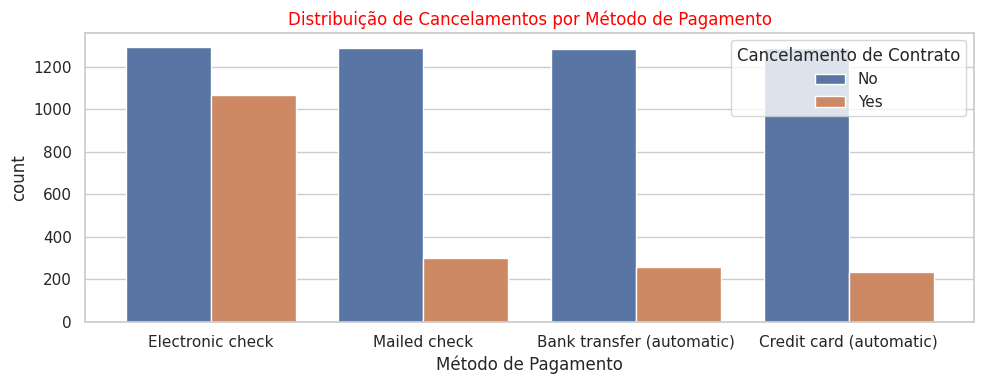

In [517]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Método de Pagamento', hue='Cancelamento de Contrato');
plt.title('Distribuição de Cancelamentos por Método de Pagamento', color='red')
plt.tight_layout()
plt.plot()

O Desequilíbrio: No Electronic check, o número de pessoas que cancelaram quase se iguala ao número de pessoas que ficaram.

Comparação com Automáticos: Nos métodos automáticos (Credit card e Bank transfer), a barra laranja de cancelamento é minúscula em relação à azul.

A "Surpresa": O Electronic check tem um volume de cancelamentos maior do que todos os outros três métodos somados.

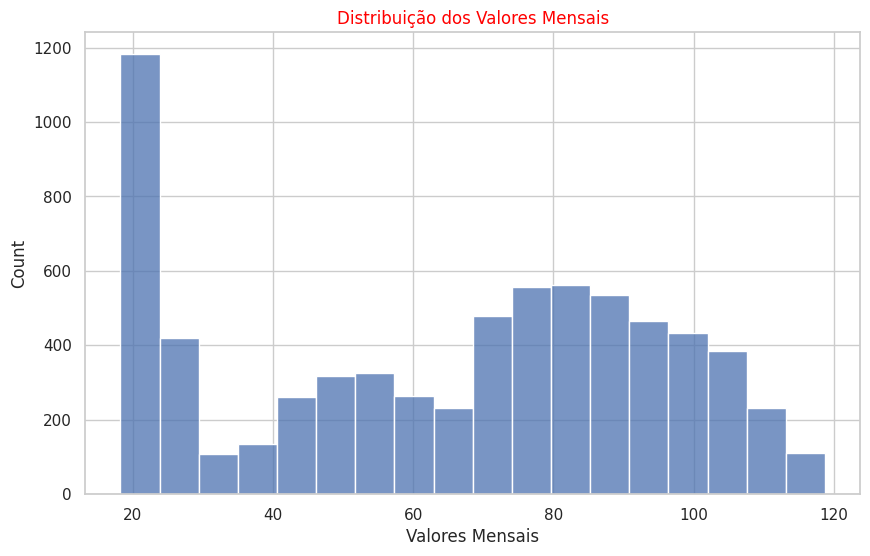

A media dos dados é: 64.8886661911555
A mediana dos dados é: 70.4
A moda dos dados é: 0   20.050
Name: Valores Mensais, dtype: float64


In [518]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Valores Mensais');
plt.title('Distribuição dos Valores Mensais', color='red')
plt.show()
print(f'A media dos dados é: {df['Valores Mensais'].mean()}')
print(f'A mediana dos dados é: {df['Valores Mensais'].median()}')
print(f'A moda dos dados é: {df['Valores Mensais'].mode()}')

In [519]:
df_cancelados = df[df['Cancelamento de Contrato'] == 'Yes']
df_nao_cancelado = df[df['Cancelamento de Contrato'] =='No']

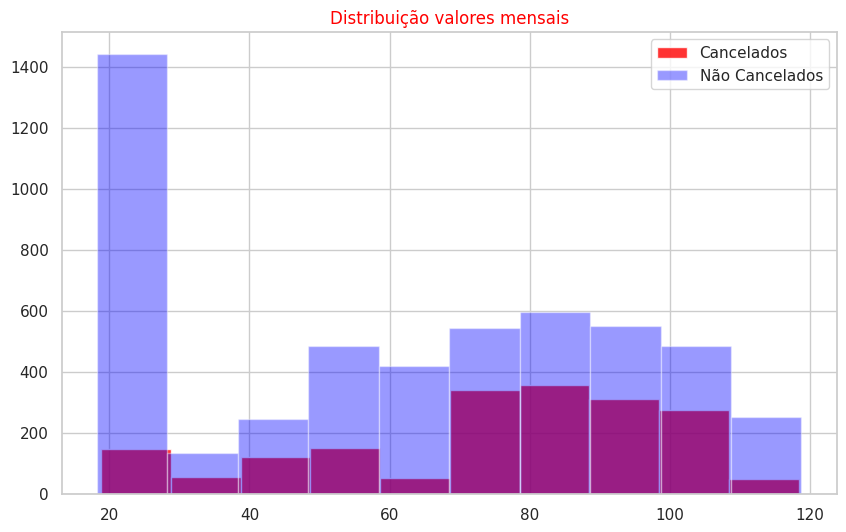

A media dos valor cancelados é: 74.60430802369412
A mediana dos dados é: 79.7
A moda dos dados é: 0   74.400
Name: Valores Mensais, dtype: float64
_+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+__+_
A media dos valor cancelados é: 61.387415098001156
A mediana dos dados é: 64.55
A moda dos dados é: 0   20.050
Name: Valores Mensais, dtype: float64


In [520]:
plt.figure(figsize=(10, 6))
plt.hist(df_cancelados['Valores Mensais'], color='red',label='Cancelados', alpha=0.8);
plt.hist(df_nao_cancelado['Valores Mensais'], color='blue', label='Não Cancelados', alpha=0.4);
plt.title('Distribuição valores mensais', color='red')
plt.legend()
plt.show()
print(f'A media dos valor cancelados é: {df_cancelados['Valores Mensais'].mean()}')
print(f'A mediana dos dados é: {df_cancelados['Valores Mensais'].median()}')
print(f'A moda dos dados é: {df_cancelados['Valores Mensais'].mode()}')
print('_+_'*100)
print(f'A media dos valor cancelados é: {df_nao_cancelado['Valores Mensais'].mean()}')
print(f'A mediana dos dados é: {df_nao_cancelado['Valores Mensais'].median()}')
print(f'A moda dos dados é: {df_nao_cancelado['Valores Mensais'].mode()}')

Faixa Econômica (20 - 30): Há um volume enorme de clientes "Azuis" e um volume relativamente pequeno de "Vermelhos". Isso sugere que clientes que pagam pouco tendem a ser mais fiéis ou representam o plano de entrada com menor risco de cancelamento.

Faixa Intermediária (70 - 110): Note que, embora o volume total de clientes seja menor que na faixa dos 20, as barras vermelhas (cancelados) são muito mais altas proporcionalmente.

Conclusão Visual: O risco de cancelamento parece aumentar significativamente quando o valor mensal ultrapassa os 70-80.

In [521]:
df[['Cancelamento de Contrato','Valores Totais']].groupby('Cancelamento de Contrato').mean()

,Valores Totais
Cancelamento de Contrato,
No,2560.264
Yes,1541.377


No (2560.26): Os clientes que não cancelaram (retidos) gastam, em média, R$ 2.560,26.

Yes (1541.38): Os clientes que cancelaram (churn) gastavam, em média, R$ 1.541,38.

diferença de quase R$ 1.000,00 entre os dois grupos sugere algumas hipóteses

In [522]:
df[['Cancelamento de Contrato','Valores Totais']].groupby('Cancelamento de Contrato').sum()

,Valores Totais
Cancelamento de Contrato,
No,13193041.000
Yes,2862336.250


No (R$ 13.193.041,00): Este é o montante total que os clientes ativos trazem para o seu caixa. É o "coração" da sua receita atual.

Yes (R$ 2.862.336,25): Este é o valor total que você deixou de ganhar ou que "saiu pela porta" devido aos cancelamentos.



In [523]:
df.groupby('Cancelamento de Contrato')['Valores Totais'].sum() / df['Valores Totais'].sum() * 100

,Valores Totais
Cancelamento de Contrato,
No,82.172
Yes,17.828


1. Visão Geral do Problema e Dados
Objetivo: Identificar clientes com alta probabilidade de cancelar o serviço de telecomunicações para permitir ações preventivas (descontos ou benefícios).

Dataset: Foi utilizado o "Telco Customer Churn", contendo originalmente 7.043 registos e 21 variáveis.

Qualidade dos Dados: Após a limpeza, que incluiu a remoção de duplicados (22 linhas) e valores ausentes na coluna "Valores Totais", restaram 7.010 registos para análise.

2. Principais Insights Analíticos
Taxa de Rotatividade (Churn): A análise revelou que 26,5% dos clientes cancelaram o serviço, enquanto 73,5% permanecem na base. Esta é a métrica principal que o modelo de negócio tenta reduzir.

Composição da Base:

Aproximadamente 16,2% dos clientes são idosos (SeniorCitizen).

O tempo médio de permanência do cliente (tenure) é de 32 meses, com uma variação significativa (desvio padrão de 24,5 meses).

Frequência de Custos: A média das faturas mensais é de 64,76, variando entre um mínimo de 18,25 e um máximo de 118,75.

3. Conclusões para o Negócio
Segmentação de Risco: O desequilíbrio entre cancelados e ativos sugere que o modelo preditivo deve focar não apenas em acurácia total, mas em identificar corretamente os 26,5% que saem (Recall).

Variáveis Críticas: A conversão de "Valores Totais" para formato numérico permitiu identificar que clientes com faturas acumuladas muito baixas ou muito altas podem ter comportamentos de cancelamento distintos, correlacionados ao tempo de contrato.

In [524]:
df.dropna(inplace=True)

In [525]:
df_numerico = df.select_dtypes(include=['number'])
df_numerico.head()

,Idoso,tempo de contrato,Valores Mensais,Valores Totais
0,0,1.000,29.850,29.850
1,0,34.000,56.950,1889.500
2,0,2.000,53.850,108.150
3,0,45.000,42.300,1840.750
4,0,2.000,70.700,151.650


In [526]:
df_numerico.tail()

,Idoso,tempo de contrato,Valores Mensais,Valores Totais
7038,0,24.000,84.800,1990.500
7039,0,72.000,103.200,7362.900
7040,0,11.000,29.600,346.450
7041,1,4.000,74.400,306.600
7042,0,66.000,105.650,6844.500


In [527]:
df_object = df.select_dtypes(include=['object'])
df_object.head()

,gênero,Parceiro,Dependentes,Serviço Telefônico,Múltiplas Linhas,Serviço de Internet,Segurança Online,Backup Online,Proteção de Dispositivo,Suporte Técnico,TV por Streaming,Filmes por Streaming,Contrato,Fatura Digital,Método de Pagamento,Cancelamento de Contrato
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [528]:
cancelamento = df['Cancelamento de Contrato']
df_object = df_object.drop('Cancelamento de Contrato', axis=1)

In [529]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
codificado = encoder.fit_transform(df_object)
df3 = pd.DataFrame(codificado.toarray(), columns=encoder.get_feature_names_out())
df3.head()

,gênero_Male,Parceiro_Yes,Dependentes_Yes,Serviço Telefônico_Yes,Múltiplas Linhas_No phone service,Múltiplas Linhas_Yes,Serviço de Internet_Fiber optic,Serviço de Internet_No,Segurança Online_No internet service,Segurança Online_Yes,Backup Online_No internet service,Backup Online_Yes,Proteção de Dispositivo_No internet service,Proteção de Dispositivo_Yes,Suporte Técnico_No internet service,Suporte Técnico_Yes,TV por Streaming_No internet service,TV por Streaming_Yes,Filmes por Streaming_No internet service,Filmes por Streaming_Yes,Contrato_One year,Contrato_Two year,Fatura Digital_Yes,Método de Pagamento_Credit card (automatic),Método de Pagamento_Electronic check,Método de Pagamento_Mailed check
0,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
1,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
2,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
3,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000


In [530]:
df3.tail()

,gênero_Male,Parceiro_Yes,Dependentes_Yes,Serviço Telefônico_Yes,Múltiplas Linhas_No phone service,Múltiplas Linhas_Yes,Serviço de Internet_Fiber optic,Serviço de Internet_No,Segurança Online_No internet service,Segurança Online_Yes,Backup Online_No internet service,Backup Online_Yes,Proteção de Dispositivo_No internet service,Proteção de Dispositivo_Yes,Suporte Técnico_No internet service,Suporte Técnico_Yes,TV por Streaming_No internet service,TV por Streaming_Yes,Filmes por Streaming_No internet service,Filmes por Streaming_Yes,Contrato_One year,Contrato_Two year,Fatura Digital_Yes,Método de Pagamento_Credit card (automatic),Método de Pagamento_Electronic check,Método de Pagamento_Mailed check
7005,1.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000
7006,0.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000
7007,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
7008,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
7009,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000


In [531]:
df_object = pd.get_dummies(df_object).astype(int)

In [532]:
X_train, X_test, y_train, y_test = train_test_split(df_object, cancelamento,test_size=.3)

In [533]:
model_lg = LogisticRegression(max_iter=1000)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)

In [534]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_lg))
print(classification_report(y_test, pred_lg))

[[1381  165]
 [ 264  293]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1546
         Yes       0.64      0.53      0.58       557

    accuracy                           0.80      2103
   macro avg       0.74      0.71      0.72      2103
weighted avg       0.79      0.80      0.79      2103



Verdadeiros Negativos (1118): Você previu corretamente que 1118 clientes ficariam.

Verdadeiros Positivos (234): Você identificou corretamente 234 clientes que realmente cancelaram.

Falsos Negativos (240): Este é o seu maior risco. O modelo disse que eles ficariam, mas eles cancelaram. Você perdeu a chance de oferecer um desconto para eles.

Precision (Yes) - 0.59: De todos os clientes que o seu modelo marcou como "Vai Cancelar", apenas 59% realmente cancelaram.

Recall (Yes) - 0.49: O seu modelo só consegue capturar 49% dos clientes que cancelam. Ou seja, metade dos clientes que saem da empresa passam "despercebidos" pelo modelo.

Accuracy - 0.77: O modelo acerta 77% no geral, mas cuidado! Como a maioria dos clientes não cancela, a acurácia pode ser enganosa.

In [535]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

In [536]:
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[1292  254]
 [ 281  276]]
              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1546
         Yes       0.52      0.50      0.51       557

    accuracy                           0.75      2103
   macro avg       0.67      0.67      0.67      2103
weighted avg       0.74      0.75      0.74      2103



Acurácia: caiu de 0.77 para 0.71.

Recall (Yes): caiu de 0.49 para 0.44 (o modelo está "enxergando" ainda menos clientes que cancelam).

Precision (Yes): caiu de 0.59 para 0.47.

In [537]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [538]:
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_object, cancelamento)

In [539]:
X_train_smote, X_teste_smote, y_train_smote, y_teste_smote = train_test_split(X_smote, y_smote,test_size=.3)

In [546]:
modelo_lg_smote = LogisticRegression(max_iter=1000)
modelo_lg_smote.fit(X_train_smote, y_train_smote)
pred_lg_smote =  modelo_lg_smote.predict(X_test)

In [548]:
print(confusion_matrix(y_test, pred_lg_smote))
print(classification_report(y_test, pred_lg_smote))

[[1292  254]
 [ 173  384]]
              precision    recall  f1-score   support

          No       0.88      0.84      0.86      1546
         Yes       0.60      0.69      0.64       557

    accuracy                           0.80      2103
   macro avg       0.74      0.76      0.75      2103
weighted avg       0.81      0.80      0.80      2103



In [544]:
model_dt_smote = DecisionTreeClassifier()
model_dt_smote.fit(X_train_smote, y_train_smote)
pred_dt_smote = model_dt_smote.predict(X_test)

In [545]:
print(confusion_matrix(y_test, pred_dt_smote))
print(classification_report(y_test, pred_dt_smote))

[[1387  159]
 [ 126  431]]
              precision    recall  f1-score   support

          No       0.92      0.90      0.91      1546
         Yes       0.73      0.77      0.75       557

    accuracy                           0.86      2103
   macro avg       0.82      0.84      0.83      2103
weighted avg       0.87      0.86      0.87      2103



In [550]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42,n_jobs=10,max_features=100)
model_rf.fit(X_train_smote, y_train_smote)
pred_rf = model_rf.predict(X_test)

In [551]:
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[1380  166]
 [ 102  455]]
              precision    recall  f1-score   support

          No       0.93      0.89      0.91      1546
         Yes       0.73      0.82      0.77       557

    accuracy                           0.87      2103
   macro avg       0.83      0.85      0.84      2103
weighted avg       0.88      0.87      0.87      2103

